# Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




The Higgs boson is a fundamental particle in particle physics, discovered in 2012 by scientists at CERN (the European Organization for Nuclear Research) through the Large Hadron Collider (LHC) experiment. It's a crucial piece in the Standard Model of particle physics, which describes the fundamental particles and forces in the universe, except for gravity.

In [2]:
drive.mount('/content/drive')
# !ls "/content/drive/MyDrive/Colab Notebooks/"

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/atlas-higgs-challenge-2014-v2.csv")

df.head()

Mounted at /content/drive


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


The ATLAS Higgs Challenge 2014 dataset contains simulated data from particle collisions, specifically focused on distinguishing between two types of events:


*   **Signal (label 1)**: Events that correspond to the production of a Higgs boson in a particle collision. The Higgs boson is a fundamental particle that was discovered in 2012 at CERN and is responsible for giving mass to other particles. These events are considered "signal" because they are of primary interest in Higgs boson research.

*   **Background (label 0)**: Events that correspond to other types of particle collisions (non-Higgs related), which do not involve the production of a Higgs boson. These are considered "background" events and are typically seen as noise in experiments trying to discover the Higgs boson.


**The Task:**

The task is to classify whether a given event (data sample) corresponds to a signal (Higgs boson event) or a background event. In other words, the classifier is trying to answer the question:

Is this event a Higgs boson production event (signal) or some other type of particle collision event (background)?



**How It Works:**

*   The dataset contains features such as energy, momentum, and other physical characteristics of the particles involved in the collision. These features are used to distinguish between signal and background events.
*   The machine learning model (e.g., Random Forest) is trained using these features (inputs) and their corresponding labels (0 for background, 1 for signal).
*   After training, the model can predict whether a new, unseen event is a Higgs signal or background based on its features.

**Why It’s Important:**

In real-world experiments like those conducted at CERN, the ability to identify Higgs boson events from the vast amount of data generated by particle collisions is crucial. The signal events are rare and can be hard to identify among the background noise, so machine learning models help researchers automatically classify events based on their features.

In [3]:
# Convert non-numeric columns to numeric using Label Encoding
for column in df.select_dtypes(include='object').columns:
    df[column] = pd.factorize(df[column])[0]


In [4]:
X = df.drop('Label', axis=1)  # Features (everything except 'Label')
y = df['Label']  # Target label


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
# Step 9: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83957
           1       1.00      1.00      1.00    161515

    accuracy                           1.00    245472
   macro avg       1.00      1.00      1.00    245472
weighted avg       1.00      1.00      1.00    245472



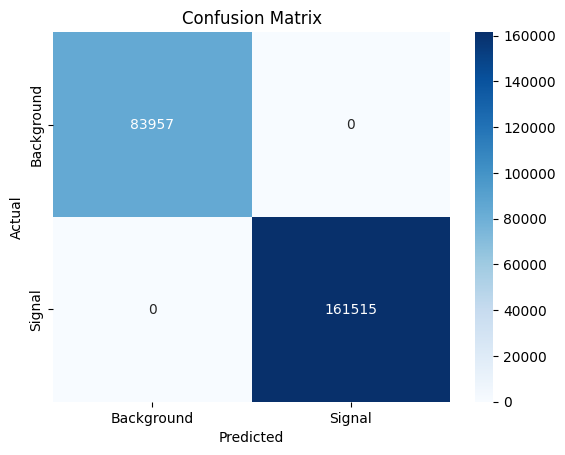

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Signal'], yticklabels=['Background', 'Signal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()